In [16]:
library(raster)
library(rgdal)
library(ggplot2)
library(broom)
library(RColorBrewer)
library(dplyr)
library(ggsn)
# set factors to false
library("tmap")
library("scales")
library("leaflet")
library("sf")
library("leaflet.extras")
library("stringr")

Loading required package: grid


Attaching package: ‘ggsn’


The following object is masked from ‘package:raster’:

    scalebar


Linking to GEOS 3.9.1, GDAL 3.2.3, PROJ 7.2.1; sf_use_s2() is TRUE



In [22]:
IRpopcsv <- "IRCountyPop.csv"
IRshapefile <-"IRshapefile"

In [97]:
popdata <- rio::import(IRpopcsv)

In [100]:
str(popdata)

'data.frame':	32 obs. of  17 variables:
 $ County : chr  "Antrim" "Armagh" "Carlow" "Cavan" ...
 $ pop1841: int  361428 227190 81658 243094 285456 851528 222043 296448 366202 370745 ...
 $ pop1851: int  360498 189091 65222 173989 211865 647088 191765 255160 327617 402858 ...
 $ pop1861: int  372008 184138 54610 153870 165884 542486 184140 237390 306236 407068 ...
 $ pop1871: int  398624 171142 49012 140735 147779 515804 173906 218499 275922 405262 ...
 $ pop1881: int  413178 154515 44103 129476 141379 494312 164991 206166 246697 418910 ...
 $ pop1891: int  416143 135444 38734 111917 124425 437216 152009 185750 222973 419216 ...
 $ pop1901: int  543329 123018 35881 97451 110658 405517 144404 173772 209891 454990 ...
 $ pop1911: int  578704 117783 34498 91173 102604 392951 140625 168447 208566 492103 ...
 $ pop1926: int  608258 105693 33018 82452 93685 364906 141994 152508 207736 494484 ...
 $ pop1936: int  635692 102646 33127 76670 88642 355253 143693 142310 208578 586173 ...
 $ pop1951

In [23]:
ogrListLayers(dsn=IRshapefile)

[1] "IRL_adm0" "IRL_adm1"
attr(,"driver")
[1] "ESRI Shapefile"
attr(,"nlayers")
[1] 2

In [89]:
IRgeo <-readOGR(IRshapefile,layer="IRL_adm1")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/chrisdrakeford/Visualising Data/week6/Ireland/IRshapefile", layer: "IRL_adm1"
with 26 features
It has 9 fields
Integer64 fields read as strings:  ID_0 ID_1 


In [55]:
str(IRdata$county)

 chr [1:32] "Antrim" "Armagh" "Carlow" "Cavan" "Clare" "Cork" "Derry" ...


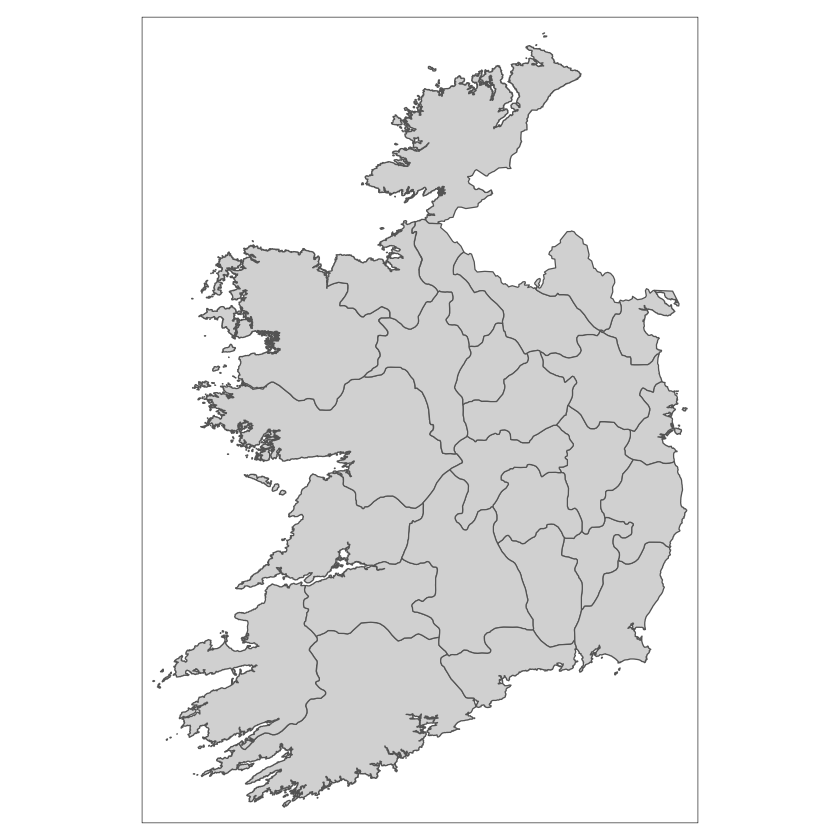

In [71]:
qtm(IRgeo)

In [103]:
str(IRgeo@data)

'data.frame':	26 obs. of  10 variables:
 $ ID_0     : chr  "109" "109" "109" "109" ...
 $ ISO      : chr  "IRL" "IRL" "IRL" "IRL" ...
 $ NAME_0   : chr  "Ireland" "Ireland" "Ireland" "Ireland" ...
 $ ID_1     : chr  "1" "2" "3" "4" ...
 $ County   : chr  "Carlow" "Cavan" "Clare" "Cork" ...
 $ TYPE_1   : chr  "Administrative County" "Administrative County" "Administrative County" "Traditional County" ...
 $ ENGTYPE_1: chr  "County" "County" "County" "County" ...
 $ NL_NAME_1: chr  NA NA NA NA ...
 $ VARNAME_1: chr  "Ceatharlach" "An Cabhán" "An Clár" "Corcaigh" ...
 $ Province : chr  "Leinster" "Ulster" "Munster" "Munster" ...


In [91]:
IRgeo@data <- rename(IRgeo@data, County = NAME_1)

In [93]:
IRgeo@data$Province <- sapply(IRgeo@data$County, switch, 
                            
                            'Carlow' = 'Leinster',
                            'Cavan' = 'Ulster',
                            'Clare' = 'Munster',
                            'Cork' = 'Munster',
                            'Donegal' = 'Ulster',
                            'Dublin' = 'Leinster',
                            'Galway' = 'Connaught',
                            'Kerry' =  'Munster',
                            'Kildare' = 'Leinster',
                            'Kilkenny' = 'Leinster',
                            'Laoighis' = 'Leinster',
                            'Leitrim' = 'Connaught',
                            'Limerick' =  'Munster',
                            'Longford' = 'Leinster',
                            'Louth' = 'Leinster',
                            'Mayo' = 'Connaught',
                            'Meath' = 'Leinster',
                            'Monaghan' = 'Ulster',
                            'Offaly' = 'Leinster',
                            'Roscommon' = 'Connaught',
                            'Sligo' = 'Connaught',
                            'Tipperary' =  'Munster',
                            'Waterford' =  'Munster',
                            'Westmeath' = 'Leinster',
                            'Wexford' = 'Leinster',
                            'Wicklow' = 'Leinster')

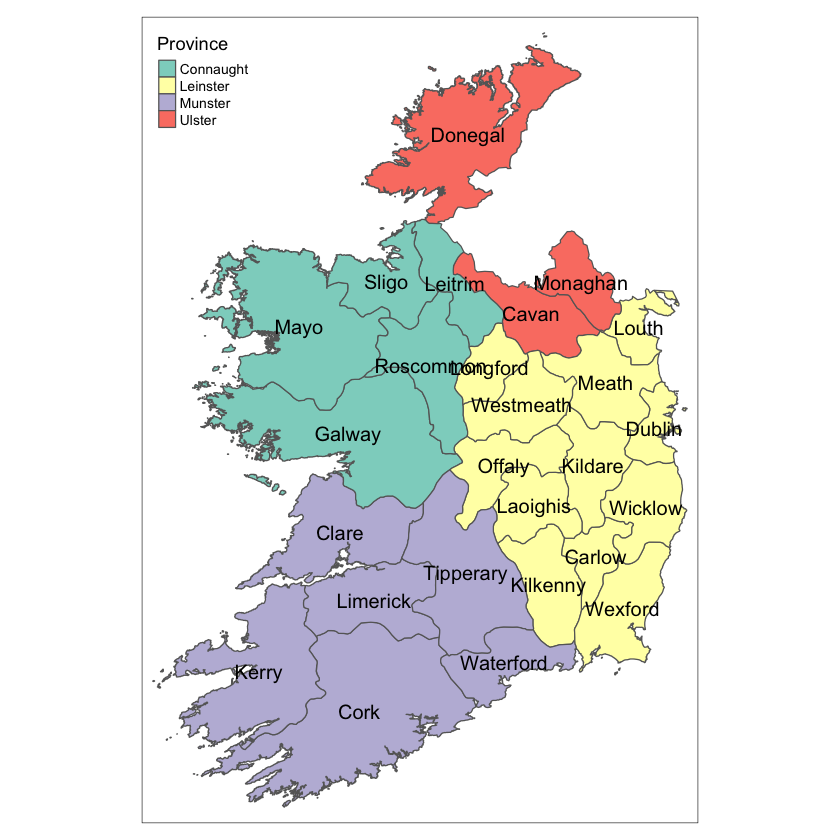

In [104]:
qtm(IRgeo, text = "County", "Province")

In [99]:
popdata <- rename(popdata, County = county)

In [115]:
popdata

County    pop1841 pop1851 pop1861 pop1871 pop1881 pop1891 pop1901 pop1911
1  Carlow     81658   65222   54610   49012   44103   38734   35881   34498 
2  Cavan     243094  173989  153870  140735  129476  111917   97451   91173 
3  Clare     285456  211865  165884  147779  141379  124425  110658  102604 
4  Cork      851528  647088  542486  515804  494312  437216  405517  392951 
5  Donegal   296448  255160  237390  218499  206166  185750  173772  168447 
6  Dublin    370745  402858  407068  405262  418910  419216  454990  492103 
7  Galway    440210  322344  271505  249720  242005  214712  195980  185568 
8  Kerry     293880  238239  201798  196586  201039  179436  163818  157824 
9  Kildare   114228   95519   90792   83614   75804   70206   63566   66627 
10 Kilkenny  200739  157334  126421  108431   98702   86488   78370   74267 
11 Laois     152211  110288   89504   79771   73124   64833   57417   54629 
12 Leitrim   155297  111915  104744   95562   90372   78618   69343   63582 
13 Limerick  329730  262025  217079  191936  180632  158912  146158  143069 
14 Longford  115607   82439   71778   64501   61009   52647   46672   43820 
15 Louth     126529  105027   88416   81596   75739   68928   66737   64528 
16 Mayo      389637  275559  255471  246030  246378  220031  202659  195520 
17 Meath     187418  144995  111186   99366   90675   80151   67497   65091 
18 Monaghan  198845  140812  125525  114225  102087   85611   74074   71006 
19 Offaly    148125  113194   91005   75900   72852   65563   60187   56832 
20 Roscommon 257900  180618  161123  140670  132490  109665  102434   95698 
21 Sligo     180780  128491  124819  115493  111578   98013   87424   82326 
22 Tipperary 441161  335964  252300  218705  201279  174675  161484  153934 
23 Waterford 193415  161500  132578  122447  112251   97849   87931   84624 
24 Westmeath 136237  104527   86303   74537   68041   61239   54502   52013 
25 Wexford   198117  176548  141307  130476  121728  109746  101887  100058 
26 Wicklow   130028  102607   90306   79645   71215   62909   60901   60535 
   pop1926 pop1936 pop1951 pop1961 pop1971 pop1981 pop1991 pop2001
1   33018   33127   32993   32248   33202    38646   39774   44829
2   82452   76670   66377   56594   49345    53855   52796   56546
3   93685   88642   80264   72753   74104    86547   89864  102109
4  364906  355253  340784  330018  352534   402162  410073  447483
5  152508  142310  131530  113842  108344   125112  128117  137575
6  494484  586173  693679  718332  852219  1003164 1030638 1122821
7  172160  170702  162437  151671  150805   173654  181987  210721
8  149171  139834  126644  116458  112772   122770  121894  132527
9   58028   57892   66437   64420   72188   104122  122656  163944
10  69913   67522   64150   58042   59905    66296   71072   76990
11  51540   50109   48455   45069   45239    51171   52314   58774
12  55907   50908   41209   33470   28360    27609   25301   25799
13 140343  141153  141239  133339  140459   161661  161956  175304
14  39847   37847   34553   30643   28250    31140   30390   31066
15  63454   64980   69309   67866   75659    88955   91157  102282
16 173255  161183  141710  123199  108909   113577  108712  114906
17  62969   61405   66337   65122   71729    95419  105370  134005
18  64741   60923   55019   46859   46082    51064   51173   52491
19  52592   51308   52544   51533   51801    58312   58494   63663
20  86567   80259   72864   66390   62062    65017   62757   64651
21  74570   70940   63755   56341   53071    59188   59004   63174
22 141323  138126  133642  124133  123919   135689  133205  140581
23  79095   78027   75232   71553   77310    88466   91487  101442
24  48645   46772   44675   42204   43562    47908   48204   58071
25  93871   92205   87952   81393   83722    97220  100289  114718
26  58884   59852   63891   62415   59258    91959   99231  118376

In [102]:
IRgeo@data <- IRgeo@data[order(IRgeo@data$County),]
popdata <- popdata[order(popdata$County),]

In [112]:
popdata<-popdata[-c(1,2,7,9,11,28),]

In [139]:
1:nrow(popdata)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26

In [114]:
rownames(popdata)<-1:nrow(popdata)

In [116]:
IRmap <- merge(IRgeo, popdata, by.x="County", by.y="County")

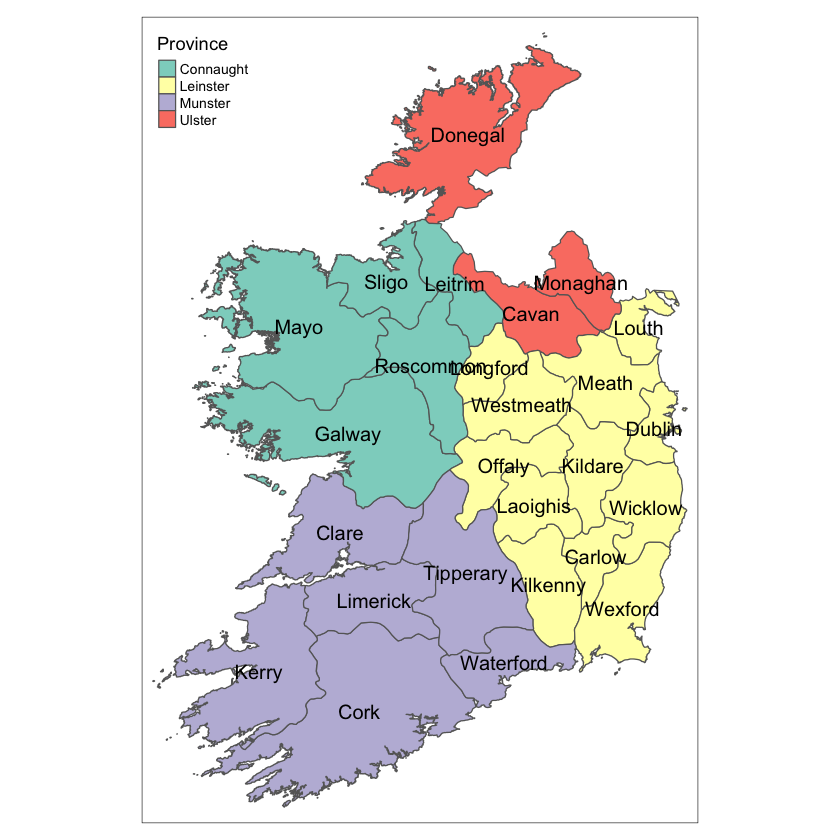

In [117]:
qtm(IRmap, text = "County", "Province")

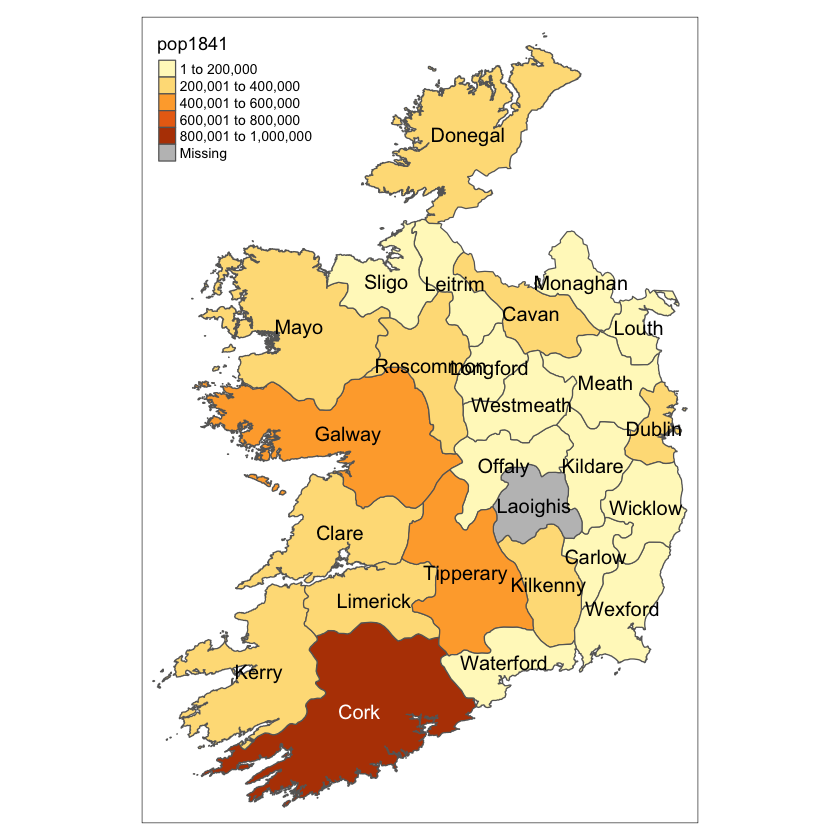

In [121]:
qtm(IRmap, text = "County", "pop1841")

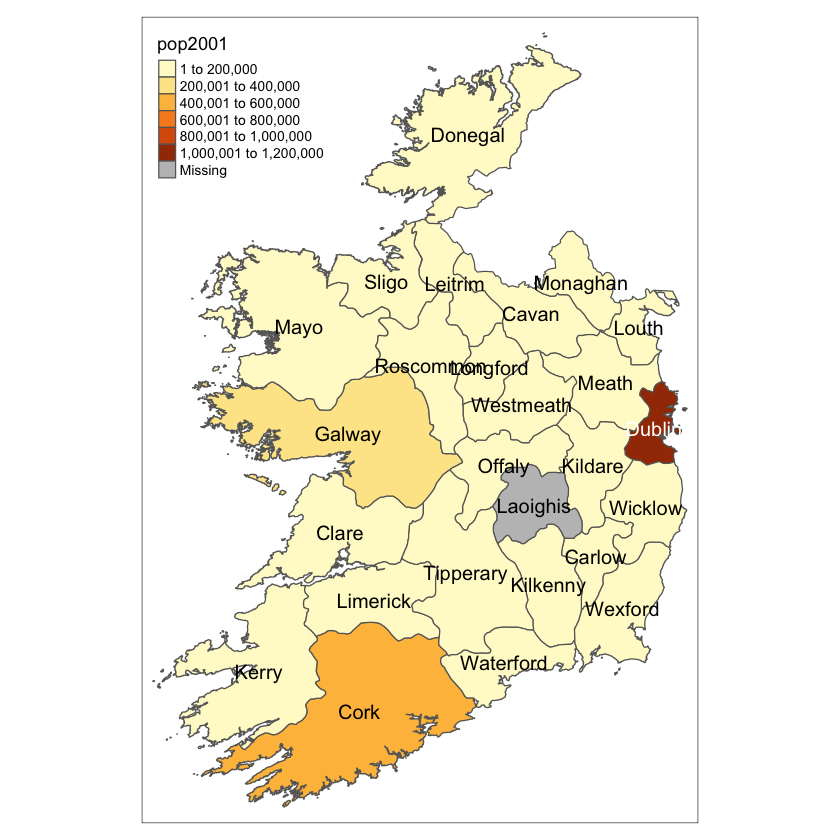

In [122]:
qtm(IRmap, text = "County", "pop2001")

In [ ]:
tmap_save(IRmap, filename="IRmap.jpg")

In [137]:
popPalette <- colorNumeric(palette = "Reds", domain=IRmap$pop2001)

In [126]:
IRpopup <- paste0("<b>County: ", 
                  IRmap$County, 
                  "</b><br />Population ", 
                  IRmap$pop2001)

In [128]:
IRmapsf<-st_as_sf(IRmap)

In [138]:
IRmapsf<-st_as_sf(IRmap)
IRmap_projected <- sf::st_transform(IRmapsf, "+proj=longlat +datum=WGS84")
leaflet(IRmap_projected) %>%
  addProviderTiles("CartoDB.Positron") %>%
  addPolygons(stroke=FALSE, 
              smoothFactor = 0.2, 
              fillOpacity = .8, 
              popup=IRpopup, 
              color= ~popPalette(IRmap$pop2001)
  )

HTML widgets cannot be represented in plain text (need html)

In [130]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ tidyr::extract()    masks raster::extract()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ dplyr::select()     masks raster::select()



In [135]:
htmlwidgets::saveWidget(IRmap_projected, file="IRmapwidget.html", libdir='Plots')

ERROR: Error in .getNamespace(pkg): invalid type/length (symbol/0) in vector allocation


In [136]:
htmlwidgets::saveWidget(widget=IRmap_projected, file="IRmapwidget.html", 
                        selfcontained=FALSE, 
                        libdir = "js")

ERROR: Error in .getNamespace(pkg): invalid type/length (symbol/0) in vector allocation
